In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/infections_testconsumption_dilution.csv")

In [3]:

df[['num_groups', 'pool_size']] = df[['num_groups', 'pool_size']].astype(str)


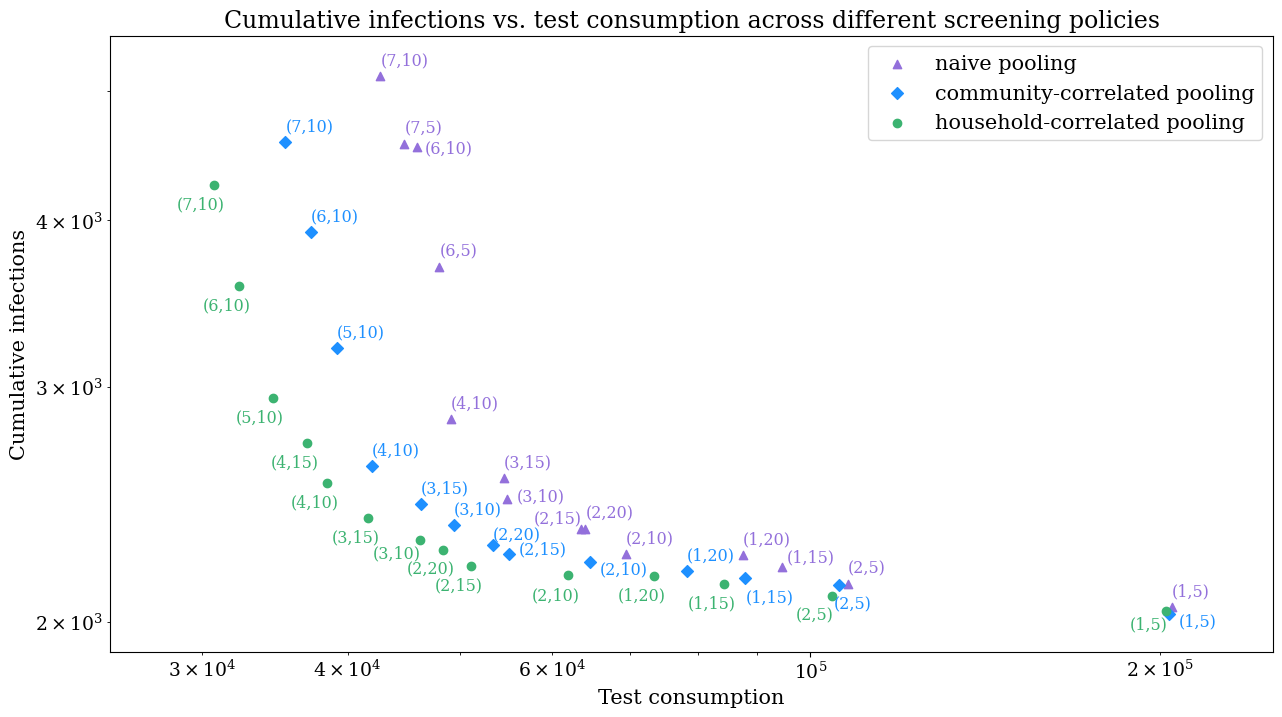

In [5]:
from collections import defaultdict

pooling_methods = ["naive", "correlated_weak", "correlated"]

markerdict = { # screening frequency
    "naive": "^",
    "correlated": "o",
    "correlated_weak": "D"   
}

legends_dict = {
    "naive": "naive pooling",
    "correlated": "household-correlated pooling",
    "correlated_weak": "community-correlated pooling",
}

colors = {
    "naive": "mediumpurple",
    "correlated": "mediumseagreen",
    "correlated_weak": "dodgerblue",
}

plt.rcParams["font.family"] = 'serif'

plt.figure(figsize=(15,8))

legends = {}

all_results = defaultdict(list)
pareto_results = defaultdict(list)

texts = []

label_fontsize = 11.5

for pooling_method in pooling_methods:

    for row_idx, row in df.iterrows():
        result_single = [
            row["num_groups"], 
            row["pool_size"],
            row[f"cum_num_tests_{pooling_method}_mean"], row[f"cum_num_tests_{pooling_method}_sem"],
            row[f"cumInfections_{pooling_method}_mean"], row[f"cumInfections_{pooling_method}_sem"]
        ]
        all_results[pooling_method].append(result_single)
    
    # sort pareto_np and pareto_cp by num_tests in ascending order
    # in each np/cp list, the point with the smallest num_tests cannot be dominated by any other point
    all_results[pooling_method].sort(key=lambda x: x[4])

    # then, iterate through the sorted list and keep only points not dominated by the previous point
    # it suffices to compare the kth with the k-1 th point only, because k-1 th point is not dominated by any point before it (ie must have lower cum infections)
    # so if the kth point has lower cum infections than the k-1 th point, then it has lower cum infections than (is not dominated by) any point before it
    pareto_results[pooling_method] = [all_results[pooling_method][0]]
    for i in range(1, len(all_results[pooling_method])):
        if all_results[pooling_method][i][2] < pareto_results[pooling_method][-1][2]:
            pareto_results[pooling_method].append(all_results[pooling_method][i])
    
    for i in range(len(pareto_results[pooling_method])):
        num_groups, pool_size, num_tests, num_tests_sem, cum_infections, cum_infections_sem = pareto_results[pooling_method][i]
        num_groups = int(num_groups)
        pool_size = int(pool_size)
        scatter = plt.scatter(
            num_tests,
            cum_infections,
            color=colors[pooling_method],
            marker=markerdict[pooling_method],
        )
        # plt.errorbar(
        #     num_tests,
        #     cum_infections,
        #     xerr=2*num_tests_sem,
        #     yerr=2*cum_infections_sem,
        #     fmt='none',
        #     ecolor=colors[pooling_method],
        #     capsize=3
        # )
        if num_groups == 1:
            legends[legends_dict[pooling_method]] = scatter

        if pooling_method == "correlated":
            if num_groups == 4 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*(0.93), cum_infections*(0.96)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 3 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*0.91, cum_infections*(0.97)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*(0.93), cum_infections*(0.96)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections*(0.96)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 5:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*0.93, cum_infections*(0.97)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            else:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*(0.93), cum_infections*(0.96)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
        elif pooling_method == "correlated_weak":
            if num_groups == 2 and pool_size == 5:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*0.99, cum_infections*0.96),
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 5:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections*0.98), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections*0.98), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 15:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 15:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.0, cum_infections*0.96), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 20:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests, cum_infections*1.01), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            else:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests, cum_infections*1.02), 
                    color=colors[pooling_method], fontsize=label_fontsize)
        else:
            if num_groups == 6 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.015, cum_infections*0.99), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 5 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.015, cum_infections*0.99), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 3 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections*0.998), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 15:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*0.91, cum_infections*1.01), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 15:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.01, cum_infections*1.01), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            else:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests, cum_infections*1.02), 
                    color=colors[pooling_method], fontsize=label_fontsize)
        

plt.xlabel("Test consumption", fontsize=15)
plt.ylabel("Cumulative infections", fontsize=15)

plt.tick_params(axis='both', which='both', labelsize=13.5)

plt.xlim(2.5*1e4, 2.5*1e5)
plt.ylim(1.9*1e3, 5.5*1e3)


plt.xscale('log')
plt.yscale('log')

plt.legend(legends.values(), legends.keys(), loc='upper right', fontsize=15)

plt.title("Cumulative infections vs. test consumption across different screening policies", fontsize=17)
plt.savefig("../figures/diff_pareto_200trials.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'Effective efficiency vs. test consumption across different screening policies')

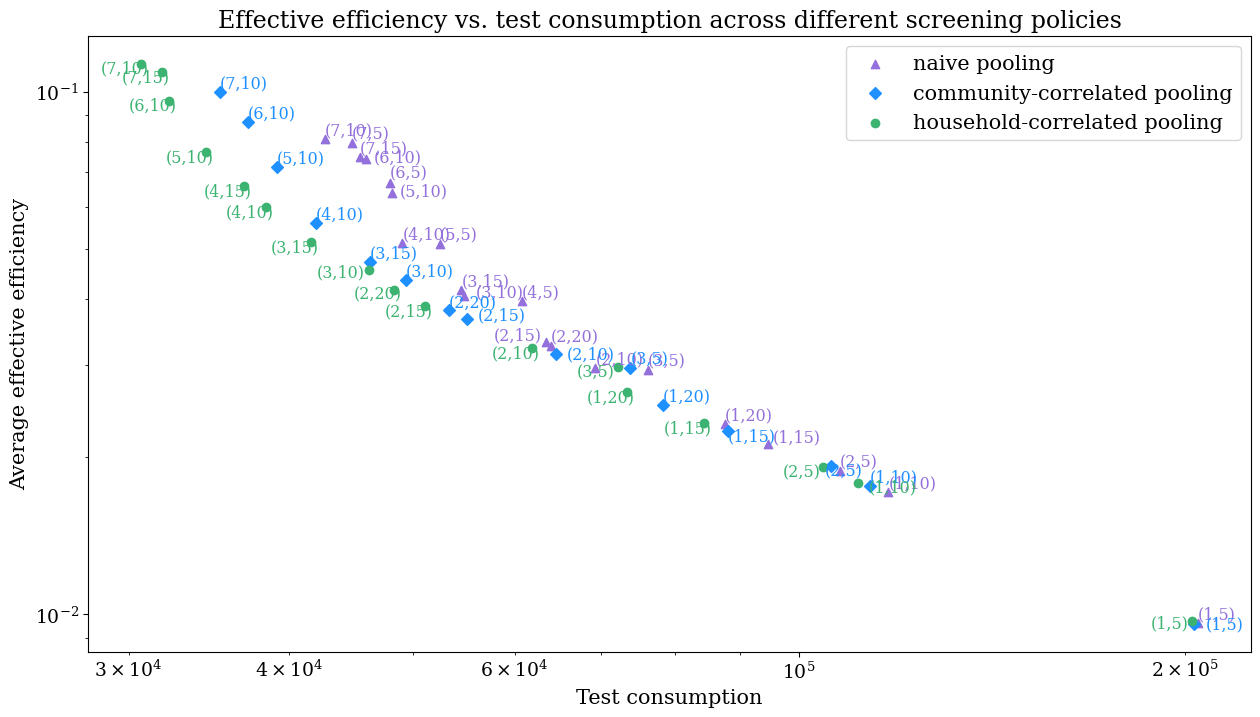

In [4]:
from collections import defaultdict

pooling_methods = ["naive", "correlated_weak", "correlated"]

markerdict = { # screening frequency
    "naive": "^",
    "correlated": "o",
    "correlated_weak": "D"   
}

legends_dict = {
    "naive": "naive pooling",
    "correlated": "household-correlated pooling",
    "correlated_weak": "community-correlated pooling",
}

colors = {
    "naive": "mediumpurple",
    "correlated": "mediumseagreen",
    "correlated_weak": "dodgerblue",
}

plt.rcParams["font.family"] = 'serif'

plt.figure(figsize=(15,8))

legends = {}

all_results = defaultdict(list)
pareto_results = defaultdict(list)

texts = []

label_fontsize = 11.5

for pooling_method in pooling_methods:

    for row_idx, row in df.iterrows():
        result_single = [
            row["num_groups"], 
            row["pool_size"],
            row[f"cum_num_tests_{pooling_method}_mean"], row[f"cum_num_tests_{pooling_method}_sem"],
            row[f"daily_effective_efficiency_{pooling_method}_mean"], row[f"daily_effective_efficiency_{pooling_method}_sem"]
        ]
        all_results[pooling_method].append(result_single)
    
    # sort pareto_np and pareto_cp by num_tests in ascending order
    # in each np/cp list, the point with the smallest num_tests cannot be dominated by any other point
    all_results[pooling_method].sort(key=lambda x: x[4])

    # then, iterate through the sorted list and keep only points not dominated by the previous point
    # it suffices to compare the kth with the k-1 th point only, because k-1 th point is not dominated by any point before it (ie must have lower cum infections)
    # so if the kth point has lower cum infections than the k-1 th point, then it has lower cum infections than (is not dominated by) any point before it
    pareto_results[pooling_method] = [all_results[pooling_method][0]]
    for i in range(1, len(all_results[pooling_method])):
        if all_results[pooling_method][i][2] < pareto_results[pooling_method][-1][2]:
            pareto_results[pooling_method].append(all_results[pooling_method][i])
    
    for i in range(len(pareto_results[pooling_method])):
        num_groups, pool_size, num_tests, num_tests_sem, cum_infections, cum_infections_sem = pareto_results[pooling_method][i]
        num_groups = int(num_groups)
        pool_size = int(pool_size)
        scatter = plt.scatter(
            num_tests,
            cum_infections,
            color=colors[pooling_method],
            marker=markerdict[pooling_method],
        )
        # plt.errorbar(
        #     num_tests,
        #     cum_infections,
        #     xerr=2*num_tests_sem,
        #     yerr=2*cum_infections_sem,
        #     fmt='none',
        #     ecolor=colors[pooling_method],
        #     capsize=3
        # )
        if num_groups == 1:
            legends[legends_dict[pooling_method]] = scatter

        if pooling_method == "correlated":
            if num_groups == 4 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*(0.93), cum_infections*(0.96)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 3 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*0.91, cum_infections*(0.97)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*(0.93), cum_infections*(0.96)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections*(0.96)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 5:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*0.93, cum_infections*(0.97)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            else:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*(0.93), cum_infections*(0.96)), 
                    color=colors[pooling_method], fontsize=label_fontsize)
        elif pooling_method == "correlated_weak":
            if num_groups == 2 and pool_size == 5:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*0.99, cum_infections*0.96),
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 5:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections*0.98), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections*0.98), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 15:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 15:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.0, cum_infections*0.96), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 20:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests, cum_infections*1.01), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            else:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests, cum_infections*1.02), 
                    color=colors[pooling_method], fontsize=label_fontsize)
        else:
            if num_groups == 6 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.015, cum_infections*0.99), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 5 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.015, cum_infections*0.99), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 3 and pool_size == 10:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.02, cum_infections*0.998), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 2 and pool_size == 15:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*0.91, cum_infections*1.01), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            elif num_groups == 1 and pool_size == 15:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests*1.01, cum_infections*1.01), 
                    color=colors[pooling_method], fontsize=label_fontsize)
            else:
                plt.annotate(
                    f"({num_groups},{pool_size})", (num_tests, cum_infections*1.02), 
                    color=colors[pooling_method], fontsize=label_fontsize)
        

plt.xlabel("Test consumption", fontsize=15)
plt.ylabel("Average effective efficiency", fontsize=15)

plt.tick_params(axis='both', which='both', labelsize=13.5)

# plt.xlim(2.5*1e4, 2.5*1e5)
# plt.ylim(1.9*1e3, 5.5*1e3)


plt.xscale('log')
plt.yscale('log')

plt.legend(legends.values(), legends.keys(), loc='upper right', fontsize=15)

plt.title("Effective efficiency vs. test consumption across different screening policies", fontsize=17)
# plt.savefig("../../figures/diff_pareto_200trials.pdf", bbox_inches='tight')

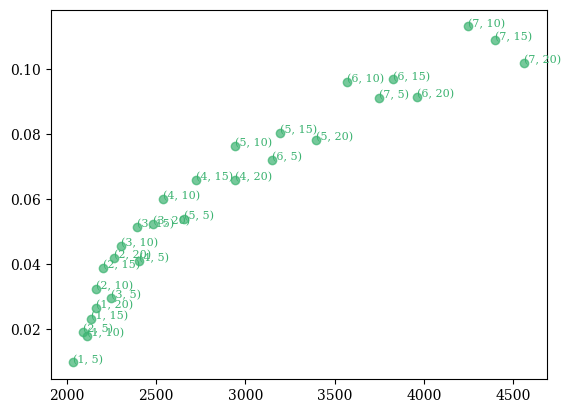

In [17]:
# plt.scatter(
#     df["cumInfections_naive_mean"],
#     df["daily_effective_efficiency_naive_mean"],
#     color=colors["naive"],
#     alpha=0.7
# )
# plt.scatter(
#     df["cumInfections_correlated_weak_mean"],
#     df["daily_effective_efficiency_correlated_weak_mean"],
#     color=colors["correlated_weak"],
#     alpha=0.7
# )

for row_idx, row in df.iterrows():

    plt.scatter(
        row["cumInfections_correlated_mean"],
        row["daily_effective_efficiency_correlated_mean"],
        color=colors["correlated"],
        alpha=0.7
    )
    plt.annotate(
        f"({int(row['num_groups'])}, {int(row['pool_size'])})", 
        (row["cumInfections_correlated_mean"], row["daily_effective_efficiency_correlated_mean"]), 
        color=colors["correlated"], fontsize=8
    )

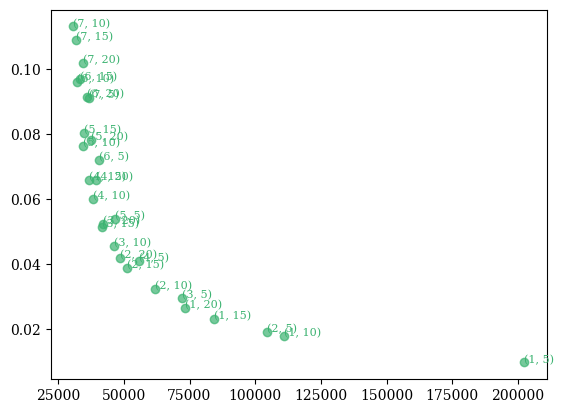

In [18]:
# plt.scatter(
#     df["cumInfections_naive_mean"],
#     df["daily_effective_efficiency_naive_mean"],
#     color=colors["naive"],
#     alpha=0.7
# )
# plt.scatter(
#     df["cumInfections_correlated_weak_mean"],
#     df["daily_effective_efficiency_correlated_weak_mean"],
#     color=colors["correlated_weak"],
#     alpha=0.7
# )

for row_idx, row in df.iterrows():

    plt.scatter(
        row["cum_num_tests_correlated_mean"],
        row["daily_effective_efficiency_correlated_mean"],
        color=colors["correlated"],
        alpha=0.7
    )
    plt.annotate(
        f"({int(row['num_groups'])}, {int(row['pool_size'])})", 
        (row["cum_num_tests_correlated_mean"], row["daily_effective_efficiency_correlated_mean"]), 
        color=colors["correlated"], fontsize=8
    )